In [132]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

with open('group_vel.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    s0x, s0y, a1x, a1y, s2x, s2y = [], [], [], [], [], []
    for row in reader:
        fd, s0, a1, s2 = row
        if s0:
            s0x.append(float(fd))
            s0y.append(float(s0))
        if a1:
            a1x.append(float(fd))
            a1y.append(float(a1))
        if s2:
            s2x.append(float(fd))
            s2y.append(float(s2))

s0x_measured = [0.9888,
1.4976,
2.3424,
1.7952,
2.112]
s0y_measured = [5.510017702,
4.813538886,
3.91342233,
5.502161343,
5.349416755]
s0y_err = [0.108094983,
0.109318956,
0.094135691,
0.076680306,
0.047457999]

a1x_measured = [2.05, 2.15, 2.9952,3.7944, 4.39]
a1y_measured = [2.801640277, 3.01752076, 4.272284123, 3.227878593, 2.840087118]
a1y_err = [0.4821477,
0.09030179,
0.082964851,
0.102012956,
]

s2x_measured = [4.10] 
s2y_measured = [2.762133383]
s2y_err = [0.146724266]
        

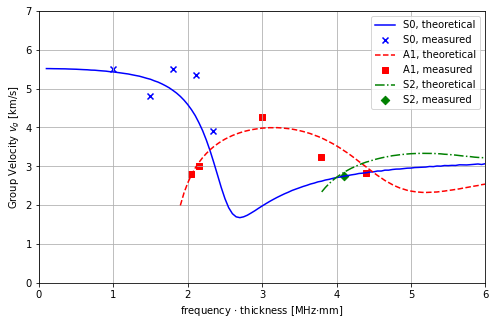

In [133]:
plt.figure(figsize=(8,5))
# plt.title('Lamb Wave Group Velocity')

plt.ylabel(r'Group Velocity $v_g$ [km/s]')
plt.xlabel(r'frequency $\cdot$ thickness [MHz$\cdot$mm]')

plt.xlim(0,6)
plt.ylim(0,7)

plt.grid()

plt.plot(s0x, s0y, 
         label = 'S0, theoretical', color = 'blue')
plt.scatter(s0x_measured, s0y_measured, 
            label = 'S0, measured', color = 'blue', marker = 'x')

plt.plot(a1x, a1y, 
         label = 'A1, theoretical', color = 'red', linestyle = '--')
plt.scatter(a1x_measured, a1y_measured, 
            label = 'A1, measured', color = 'red', marker = 's')

plt.plot(s2x, s2y, 
         label = 'S2, theoretical', linestyle = '-.', color = 'green')
plt.scatter(s2x_measured, s2y_measured, 
            label = 'S2, measured', color = 'green', marker = 'D')

plt.legend()

plt.savefig('PHY21.png')

In [134]:
chisq0 = 0.
for x,y in zip(s0x_measured, s0y_measured):
    obs = y
    est = s0y[np.argmin(np.abs(np.array(s0x)-x))]
    chisq0 += (obs-est)**2 / est
print(chisq0)

0.5649149227934267


In [135]:
chisq1 = 0.
for x,y in zip(a1x_measured, a1y_measured):
    obs = y
    est = a1y[np.argmin(np.abs(np.array(a1x)-x))]
    chisq1 += (obs-est)**2 / est
print(chisq1)

0.09702657428142246


In [136]:
chisq2 = 0.
for x,y in zip(s2x_measured, s2y_measured):
    obs = y
    est = s2y[np.argmin(np.abs(np.array(s2x)-x))]
    chisq2 += (obs-est)**2 / est
print(chisq2)

0.0024136647497450623


In [137]:
fx_s = [0.9888,
1.4976,
2.3424,
1.7952,
2.112,
2.05, 2.15, 2.9952,3.7944, 4.39,
4.10
]
v_s = [5.510017702,
4.813538886,
3.91342233,
5.502161343,
5.349416755,
2.801640277, 3.01752076, 4.272284123, 3.227878593, 2.840087118,
2.762133383
]
err_s = [0.108094983,
0.109318956,
0.094135691,
0.076680306,
0.047457999,
0.4821477,
0.09030179,
0.082964851,
0.102012956,
0.146724266
]
for _ in v_s: print(_)

5.510017702
4.813538886
3.91342233
5.502161343
5.349416755
2.801640277
3.01752076
4.272284123
3.227878593
2.840087118
2.762133383


In [138]:
v_s = ['\SI{'+str(ufloat(n,e)).replace('+/-','(')+')}{}' for n,e in zip(v_s, err_s)]
for _ in v_s: print(_)



\SI{5.51(0.11)}{}
\SI{4.81(0.11)}{}
\SI{3.91(0.09)}{}
\SI{5.50(0.08)}{}
\SI{5.35(0.05)}{}
\SI{2.8(0.5)}{}
\SI{3.02(0.09)}{}
\SI{4.27(0.08)}{}
\SI{3.23(0.10)}{}
\SI{2.84(0.15)}{}


In [139]:
for x in a1x_measured:
    y = a1y[np.argmin(np.abs(np.array(a1x) - x))]
    print(y)

    

2.784
3.099
3.984
3.729
2.98
